df observado: 
           Columnas Tipo de Índice                             Rango de Índice  \
td              td  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   
rh_out      rh_out  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   
t_out        t_out  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   
wind          wind  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   
wind_dir  wind_dir  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   

          Número de Datos  Número de NaN  
td                  14369           1517  
rh_out              15523            363  
t_out               15521            365  
wind                15882              4  
wind_dir            15882              4  
df modelo wfr: 
      Columnas Tipo de Índice                             Rango de Índice  \
td2       td2  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:00)   
rh2       rh2  DatetimeIndex  (2017-10-03 06:00:00, 2019-07-29 19:00:0

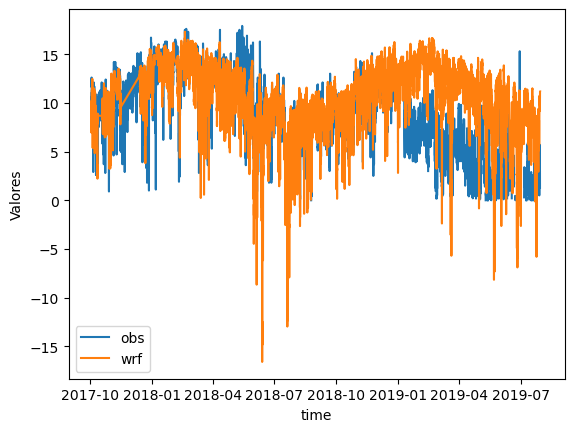

In [91]:
import pandas as pd
import matplotlib.pyplot as plt


### funcion para analisar contenido de dataframe
def analisis_df(df):
    columna = df.columns
    index_type = df.index.__class__.__name__
    index_range = (df.index[0], df.index[-1])
    num_data_por_columna = df.count()
    num_nan_por_columna = df.isnull().sum()

    analisis_df = pd.DataFrame({
        'Columnas': columna,
        'Tipo de Índice': index_type,
        'Rango de Índice': [index_range] * len(columna),
        'Número de Datos': num_data_por_columna,
        'Número de NaN': num_nan_por_columna
    })
    return analisis_df





# Cargar los datos de los archivos PKL en DataFrames
path1 = 'meteo-2017-21019_por-hora_formato.csv'
path2 = 'Weather_pronostico_1dia.pkl'

df_obs = pd.read_csv(path1)

df_wrf = pd.read_pickle(path2)

### correcciones de formato para los indices de cada dataframe
df_obs.index =df_obs['Unnamed: 0']
df_obs.index = pd.to_datetime(df_obs.index)
df_wrf.index = df_wrf.index.round('H')

### reagrupamos los dataframe 

# Definir el rango de tiempo deseado
fecha_inicio = '2017-10-03 06:00:00'
fecha_fin = '2019-07-29 19:00:00'

df_wrf = df_wrf[fecha_inicio:fecha_fin]

# reagrupamos para las columnas de interes en un mismo orden.
columnas_interes = ['td', 'rh_out', 't_out','wind', 'wind_dir']
df_obs =df_obs[columnas_interes]

#### analisis del contenido de cada dataframe
analisis_resultado1 = analisis_df(df_obs)
print('df observado: \n' ,analisis_resultado1)
analisis_resultado2 = analisis_df(df_wrf)
print('df modelo wfr: \n',analisis_resultado2)



colum_obs = 'td'
colum_wrf = 'td2'
fig, ax = plt.subplots()
       # Graficar las columnas de los DataFrames en el mismo gráfico
ax.plot(df_obs[colum_obs], label='obs' )
ax.plot(df_wrf[colum_wrf], label='wrf')

    # Agregar leyenda
ax.legend()

    # Etiquetas y título
ax.set_xlabel('time')
ax.set_ylabel('Valores')


    # Mostrar la gráfica
plt.show()
